<a href="https://colab.research.google.com/github/jpiche0720/DS-Unit-2-Linear-Models/blob/master/module1-regression-1/LS_DS_211_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lambda School Data Science

*Unit 2, Sprint 1, Module 1*

---

# Regression 1

## Assignment

You'll use another **New York City** real estate dataset. 

But now you'll **predict how much it costs to rent an apartment**, instead of how much it costs to buy a condo.

The data comes from renthop.com, an apartment listing website.

- [X] Look at the data. Choose a feature, and plot its relationship with the target.
- [X] Use scikit-learn for linear regression with one feature. You can follow the [5-step process from Jake VanderPlas](https://jakevdp.github.io/PythonDataScienceHandbook/05.02-introducing-scikit-learn.html#Basics-of-the-API).
- [X] Define a function to make new predictions and explain the model coefficient.
- [X] Organize and comment your code.

> [Do Not Copy-Paste.](https://docs.google.com/document/d/1ubOw9B3Hfip27hF2ZFnW3a3z9xAgrUDRReOEo-FHCVs/edit) You must type each of these exercises in, manually. If you copy and paste, you might as well not even do them. The point of these exercises is to train your hands, your brain, and your mind in how to read, write, and see code. If you copy-paste, you are cheating yourself out of the effectiveness of the lessons.

If your **Plotly** visualizations aren't working:
- You must have JavaScript enabled in your browser
- You probably want to use Chrome or Firefox
- You may need to turn off ad blockers
- [If you're using Jupyter Lab locally, you need to install some "extensions"](https://plot.ly/python/getting-started/#jupyterlab-support-python-35)

## Stretch Goals
- [ ] Do linear regression with two or more features.
- [ ] Read [The Discovery of Statistical Regression](https://priceonomics.com/the-discovery-of-statistical-regression/)
- [ ] Read [_An Introduction to Statistical Learning_](http://faculty.marshall.usc.edu/gareth-james/ISL/ISLR%20Seventh%20Printing.pdf), Chapter 2.1: What Is Statistical Learning?

In [0]:
import sys

# If you're on Colab:
if 'google.colab' in sys.modules:
    DATA_PATH = 'https://raw.githubusercontent.com/LambdaSchool/DS-Unit-2-Applied-Modeling/master/data/'

# If you're working locally:
else:
    DATA_PATH = '../data/'
    
# Ignore this Numpy warning when using Plotly Express:
# FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
import warnings
warnings.filterwarnings(action='ignore', category=FutureWarning, module='numpy')

In [0]:
# Read New York City apartment rental listing data
import pandas as pd
df = pd.read_csv(DATA_PATH+'apartments/renthop-nyc.csv')
assert df.shape == (49352, 34)

In [0]:
# Remove outliers: 
# the most extreme 1% prices,
# the most extreme .1% latitudes, &
# the most extreme .1% longitudes
df = df[(df['price'] >= 1375) & (df['price'] <= 15500) & 
        (df['latitude'] >=40.57) & (df['latitude'] < 40.99) &
        (df['longitude'] >= -74.1) & (df['longitude'] <= -73.38)]

# LOOK AT THE DATA
## Interesting Features:

- interest_level 
- Bedrooms / Bathrooms (size of unit) 
- doorman (income for security personel)
- new construction 
- lat and long
- description (maybe how many words are used in describing may be a way to capture how many features are in that listing)

In [0]:
print(df.shape)
df.head()

(48818, 34)


,bathrooms,bedrooms,created,description,display_address,latitude,longitude,price,street_address,interest_level,...,high_speed_internet,balcony,swimming_pool,new_construction,terrace,exclusive,loft,garden_patio,wheelchair_access,common_outdoor_space
0,1.5,3,2016-06-24 07:54:24,A Brand New 3 Bedroom 1.5 bath ApartmentEnjoy ...,Metropolitan Avenue,40.7145,-73.9425,3000,792 Metropolitan Avenue,medium,...,0,0,0,0,0,0,0,0,0,0
1,1.0,2,2016-06-12 12:19:27,,Columbus Avenue,40.7947,-73.9667,5465,808 Columbus Avenue,low,...,0,0,0,0,0,0,0,0,0,0
2,1.0,1,2016-04-17 03:26:41,"Top Top West Village location, beautiful Pre-w...",W 13 Street,40.7388,-74.0018,2850,241 W 13 Street,high,...,0,0,0,0,0,0,0,0,0,0
3,1.0,1,2016-04-18 02:22:02,Building Amenities - Garage - Garden - fitness...,East 49th Street,40.7539,-73.9677,3275,333 East 49th Street,low,...,0,0,0,0,0,0,0,0,0,0
4,1.0,4,2016-04-28 01:32:41,Beautifully renovated 3 bedroom flex 4 bedroom...,West 143rd Street,40.8241,-73.9493,3350,500 West 143rd Street,low,...,0,0,0,0,0,0,0,0,0,0


In [0]:
df.describe()

,bathrooms,bedrooms,latitude,longitude,price,elevator,cats_allowed,hardwood_floors,dogs_allowed,doorman,...,high_speed_internet,balcony,swimming_pool,new_construction,terrace,exclusive,loft,garden_patio,wheelchair_access,common_outdoor_space
count,48818.000000,48818.000000,48818.000000,48818.000000,48818.000000,48818.000000,48818.000000,48818.000000,48818.000000,48818.000000,...,48818.000000,48818.000000,48818.000000,48818.000000,48818.000000,48818.000000,48818.000000,48818.00000,48818.000000,48818.000000
mean,1.201790,1.537158,40.750756,-73.972758,3579.560982,0.524827,0.478266,0.478266,0.447622,0.424843,...,0.087201,0.060469,0.055205,0.051907,0.046192,0.043304,0.042710,0.03933,0.027224,0.026240
std,0.470707,1.106078,0.038962,0.028887,1762.420875,0.499388,0.499533,0.499533,0.497254,0.494324,...,0.282133,0.238357,0.228382,0.221842,0.209903,0.203542,0.202204,0.19438,0.162736,0.159851
min,0.000000,0.000000,40.571200,-74.087300,1375.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1.000000,1.000000,40.728300,-73.991800,2500.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,1.000000,1.000000,40.751700,-73.978000,3150.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
75%,1.000000,2.000000,40.774000,-73.955000,4095.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
max,10.000000,8.000000,40.989400,-73.700100,15500.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [0]:
df['price'].value_counts()


2500     1106
3200      879
3000      837
2700      776
2400      772
         ... 
6939        1
4858        1
10095       1
6811        1
12630       1
Name: price, Length: 2685, dtype: int64

# Baseline Model

In [0]:
mean = df['price'].mean()

In [0]:
errors = df['price']-mean

In [0]:
errors.abs().mean()

1201.5251847945751

# Use scikit-learn for linear regression with one feature.

## Fit model
- sklearn.linear_model.LinearRegressison

## Evaluation Metric
- sklearn.metrics.mean_absolute_error

## Plot Trendline
- matplotlib.pyplot
- seaborn

In [0]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

In [0]:
train, test = train_test_split(df,test_size=0.2)

In [0]:
features = ['bedrooms']
target = 'price'
X_train = train[features]
y_train = train[target]
X_test = test[features]
y_true = test[target]


The mean absolute error of our models predictions is $979.62
The Coefficient for the bedroom feature is $852.87
The intercept for the model is $2,269.49


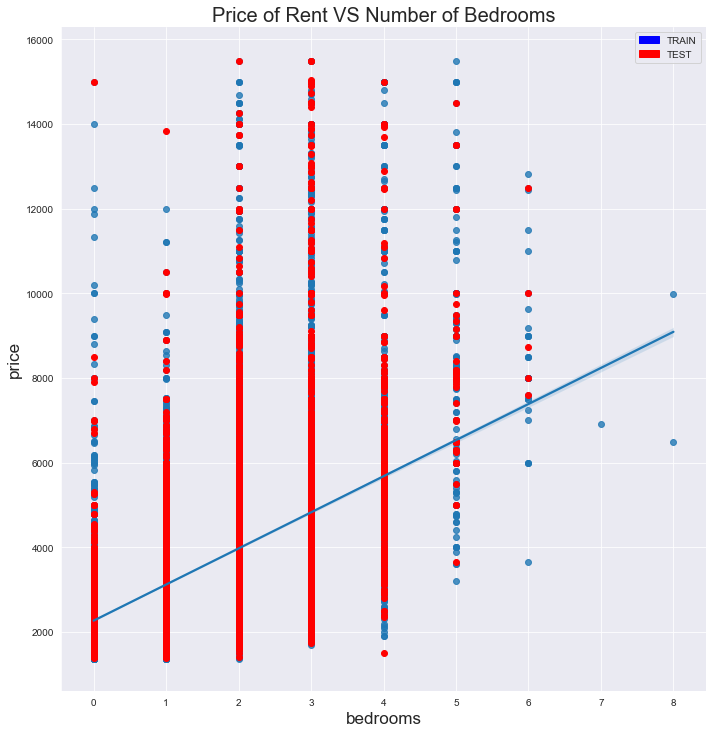

In [0]:
#Fit Model
model = LinearRegression()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

# Evaluate model 
coef = model.coef_[0]
intercept = model.intercept_


mae = mean_absolute_error(y_true,y_pred)

# Explain models accuracy and coef
print(f'The mean absolute error of our models predictions is ${mae:,.02f}')
print(f'The Coefficient for the bedroom feature is ${coef:,.02f}')
print(f'The intercept for the model is ${intercept:,.02f}')


# Plot Trendline
sns.set_style('darkgrid')
plt.rcParams['axes.labelsize']=17
fig = sns.lmplot('bedrooms','price',train,height=10)
plt.scatter(X_test,y_true,c='r')
plt.title('Price of Rent VS Number of Bedrooms',fontsize=20)


blue_patch = mpatches.Patch(color='blue', label='TRAIN')
red_patch = mpatches.Patch(color='red', label='TEST')
plt.legend(handles=[blue_patch,red_patch])

plt.legend(handles=[blue_patch,red_patch])

plt.show()



# With two new feature against the target


## Features 
- Bedrooms + Bathrooms + dining room = Rooms
- Desription length = short,medium,long = 1,2,3

## Target = Price

### Use plotly to visualize our single feature against our target 



In [0]:
# Feature Engineer Rooms

df['rooms'] = df['bathrooms']+df['bedrooms']+df['dining_room']


# Feature Engineer Description Length
def string_length(str):
  return len(str)

df['description']= df['description'].astype(str)
df['description_length'] = df['description'].apply(string_length)
df['description_length'] = pd.cut(df['description_length'],5,labels=[0,1,2,3,4]).astype(int)


In [0]:
train, test = train_test_split(df,test_size=.2)

In [0]:
features = ['rooms','description_length']
target = 'price'

X_train = train[features]
y_train = train[target]
X_test = test[features]
y_true = test[target]

In [0]:
model = LinearRegression()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

# Evaluate model 
X1 = model.coef_[0]
X2 = model.coef_[1]
intercept = model.intercept_


mae = mean_absolute_error(y_true,y_pred)

# Explain models accuracy and coef
print(f'The mean absolute error of our models predictions is ${mae:,.02f}')
print(f'The Coefficient for the room feature is ${X1:,.02f}')
print(f'The Coefficient for the description feature is ${X2:,.02f}')
print(f'The intercept for the model is ${intercept:,.02f}')


The mean absolute error of our models predictions is $911.08
The Coefficient for the room feature is $763.03
The Coefficient for the description feature is $262.58
The intercept for the model is $1,365.97


In [0]:
X_test= [[3,3]]
model.predict(X_test)

array([4442.78357377])

# DEFINE A FUNCTION 

- Make new predictions
- explain the model coefficient 

In [0]:

def apartment_price(room_number,description_length):
    '''X1= Number of Beds and Baths ; X2= length of description (1-5)'''
    
    train, test = train_test_split(df,test_size=.2)
    # Set up data
    features = ['rooms','description_length']
    target = 'price'
    X_train = train[features]
    y_train = train[target]
    X_test = test[features]
    y_true = test[target]
    
    # Fit Linear Regression
    model = LinearRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    # Evaluate model 
    X1 = model.coef_[0]
    X2 = model.coef_[1]
    intercept = model.intercept_
    mae = mean_absolute_error(y_true,y_pred)
    
    # Explain models accuracy and coef
    print(f'The mean absolute error of our models predictions is ${mae:,.02f}')
    print(f'The Coefficient for the room feature is ${X1:,.02f}')
    print(f'The Coefficient for the description feature is ${X2:,.02f}')
    print(f'The intercept for the model is ${intercept:,.02f}','\n')
    # Predict
    prediction = [[room_number,description_length]]
    pred = model.predict(prediction)
    print(f'We predict that a {description_length} apartment listing with {room_number} rooms will cost')
    print(f'approximately {pred[0]:,.2f} with a mean absolute error of {mae:,.2f}')
    return 

In [0]:
apartment_price(1,2)

The mean absolute error of our models predictions is $893.92
The Coefficient for the room feature is $755.40
The Coefficient for the description feature is $253.80
The intercept for the model is $1,381.19 

We predict that a 2 apartment listing with 1 rooms will cost
approximately 2,644.18 with a mean absolute error of 893.92


In [0]:
apartment_price(5,5)

The mean absolute error of our models predictions is $916.77
The Coefficient for the room feature is $756.69
The Coefficient for the description feature is $277.66
The intercept for the model is $1,373.63 

We predict that a 5 apartment listing with 5 rooms will cost
approximately 6,545.37 with a mean absolute error of 916.77
